In [111]:
import numpy as np
import os
import cv2

In [112]:
classes = ['cat', 'cow', 'dog', 'lamb', 'zebra']
data_dir = '/content/sample_data/dataset'
X, y = [], []

In [113]:
from skimage.feature import hog
def extract_hog_features(img_path):
  img =cv2.imread(img_path)
  if img is None:
    print(f"Error loading image: {img_path}")
    return None
  img = cv2.resize(img, (128, 128))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  features = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
  return features

In [114]:
for label, cls in enumerate(classes):
  cls_dir = os.path.join(data_dir, cls)
  if not os.path.isdir(cls_dir):
    continue
  for file in os.listdir(cls_dir):
    path = os.path.join(cls_dir, file)
    features = extract_hog_features(path)
    if features is not None:
      X.append(features)
      y.append(label)

In [115]:
X = np.array(X)
y= np.array(y)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [117]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha= 3.0, random_state = 42 )
clf.fit(X_train, y_train)

RidgeClassifier(alpha=3.0, random_state=42)

In [118]:
y_pred = clf.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")

Accuracy: 65.09433962264151 %


In [120]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))


Classification Report:
              precision    recall  f1-score   support

         cat       0.95      0.91      0.93        22
         cow       0.50      0.40      0.44        20
         dog       0.64      0.43      0.51        21
        lamb       0.49      0.81      0.61        21
       zebra       0.75      0.68      0.71        22

    accuracy                           0.65       106
   macro avg       0.67      0.65      0.64       106
weighted avg       0.67      0.65      0.65       106



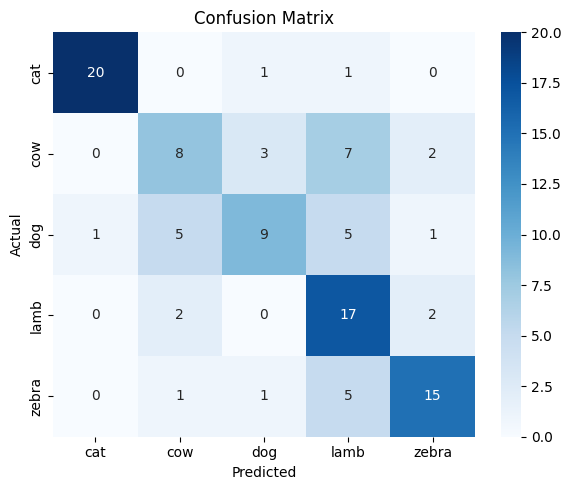

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [122]:
import matplotlib.pyplot as plt
import random

for i in random.sample(range(len(X_test)), 5):
    print(f"Sample {i}: Predicted: {classes[y_pred[i]]} | Actual: {classes[y_test[i]]}")

Sample 9: Predicted: lamb | Actual: dog
Sample 87: Predicted: lamb | Actual: cat
Sample 14: Predicted: dog | Actual: dog
Sample 63: Predicted: zebra | Actual: zebra
Sample 91: Predicted: cat | Actual: cat
